In [104]:
!pip install proplot
import warnings
warnings.filterwarnings('ignore') 

You should consider upgrading via the 'C:\Users\khan1\anaconda3\python.exe -m pip install --upgrade pip' command.


In [105]:
import pandas as pd
import numpy as np
import matplotlib as mplt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing   
import matplotlib as mpl
import proplot as pplt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import ensemble
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import statsmodels.api as sm


In [106]:
data = pd.read_csv('C:/Users/khan1/OneDrive/Documents/867/MusicData.csv',encoding='latin-1')
data.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [107]:
data.describe()

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,...,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,2001.455902,3.893979,0.853307,-8.817262,107.348267,0.622866,5.384605,0.433843,0.675471,0.010817,...,95.653221,-63.703984,50.057489,-59.515016,68.028067,-87.340055,55.520722,-50.868457,47.490774,0.147742
std,5.815223,0.532561,0.243748,4.377079,24.665030,0.304656,3.572579,0.273826,0.243473,0.013671,...,26.859726,15.970244,14.463524,17.190527,20.381321,30.464274,23.549473,11.701530,12.463966,0.354868
min,1990.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,...,15.699000,-158.756000,-25.955000,-149.507000,8.415000,-208.819000,-6.359000,-145.599000,7.200000,0.000000
25%,1997.000000,4.000000,0.819250,-10.847000,88.860250,0.372000,2.000000,0.204000,0.500138,0.003000,...,76.498000,-73.050750,40.584500,-70.282500,53.037250,-105.130250,39.196000,-58.058000,38.975250,0.000000
50%,2002.000000,4.000000,0.979000,-7.649000,103.268000,0.701500,6.000000,0.451500,0.718160,0.007000,...,94.632500,-62.661500,49.220000,-58.650000,65.935000,-83.074000,50.895000,-50.892500,46.437500,0.000000
75%,2006.000000,4.000000,1.000000,-5.640000,124.800500,0.892000,9.000000,0.646000,0.887396,0.014000,...,112.708250,-52.982750,58.462000,-47.699750,81.267000,-64.518000,66.593000,-43.292250,55.030250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,244.307000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-2.382000,144.985000,1.140000,161.518000,-10.640000,192.417000,-6.497000,110.272000,1.000000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   songID                    7574 non-null   object 
 4   artistID                  7574 non-null   object 
 5   timesignature             7574 non-null   int64  
 6   timesignature_confidence  7574 non-null   float64
 7   loudness                  7574 non-null   float64
 8   tempo                     7574 non-null   float64
 9   tempo_confidence          7574 non-null   float64
 10  key                       7574 non-null   int64  
 11  key_confidence            7574 non-null   float64
 12  energy                    7574 non-null   float64
 13  pitch                     7574 non-null   float64
 14  timbre_0

In [109]:
data.timesignature= data.timesignature.astype(float)
data.key=data.key.astype(float)
data.year=data.year.astype(float)
data  = data.drop(['songtitle','artistname','songID','artistID'], axis = 1)

In [110]:
data.isna().sum()

year                        0
timesignature               0
timesignature_confidence    0
loudness                    0
tempo                       0
tempo_confidence            0
key                         0
key_confidence              0
energy                      0
pitch                       0
timbre_0_min                0
timbre_0_max                0
timbre_1_min                0
timbre_1_max                0
timbre_2_min                0
timbre_2_max                0
timbre_3_min                0
timbre_3_max                0
timbre_4_min                0
timbre_4_max                0
timbre_5_min                0
timbre_5_max                0
timbre_6_min                0
timbre_6_max                0
timbre_7_min                0
timbre_7_max                0
timbre_8_min                0
timbre_8_max                0
timbre_9_min                0
timbre_9_max                0
timbre_10_min               0
timbre_10_max               0
timbre_11_min               0
timbre_11_

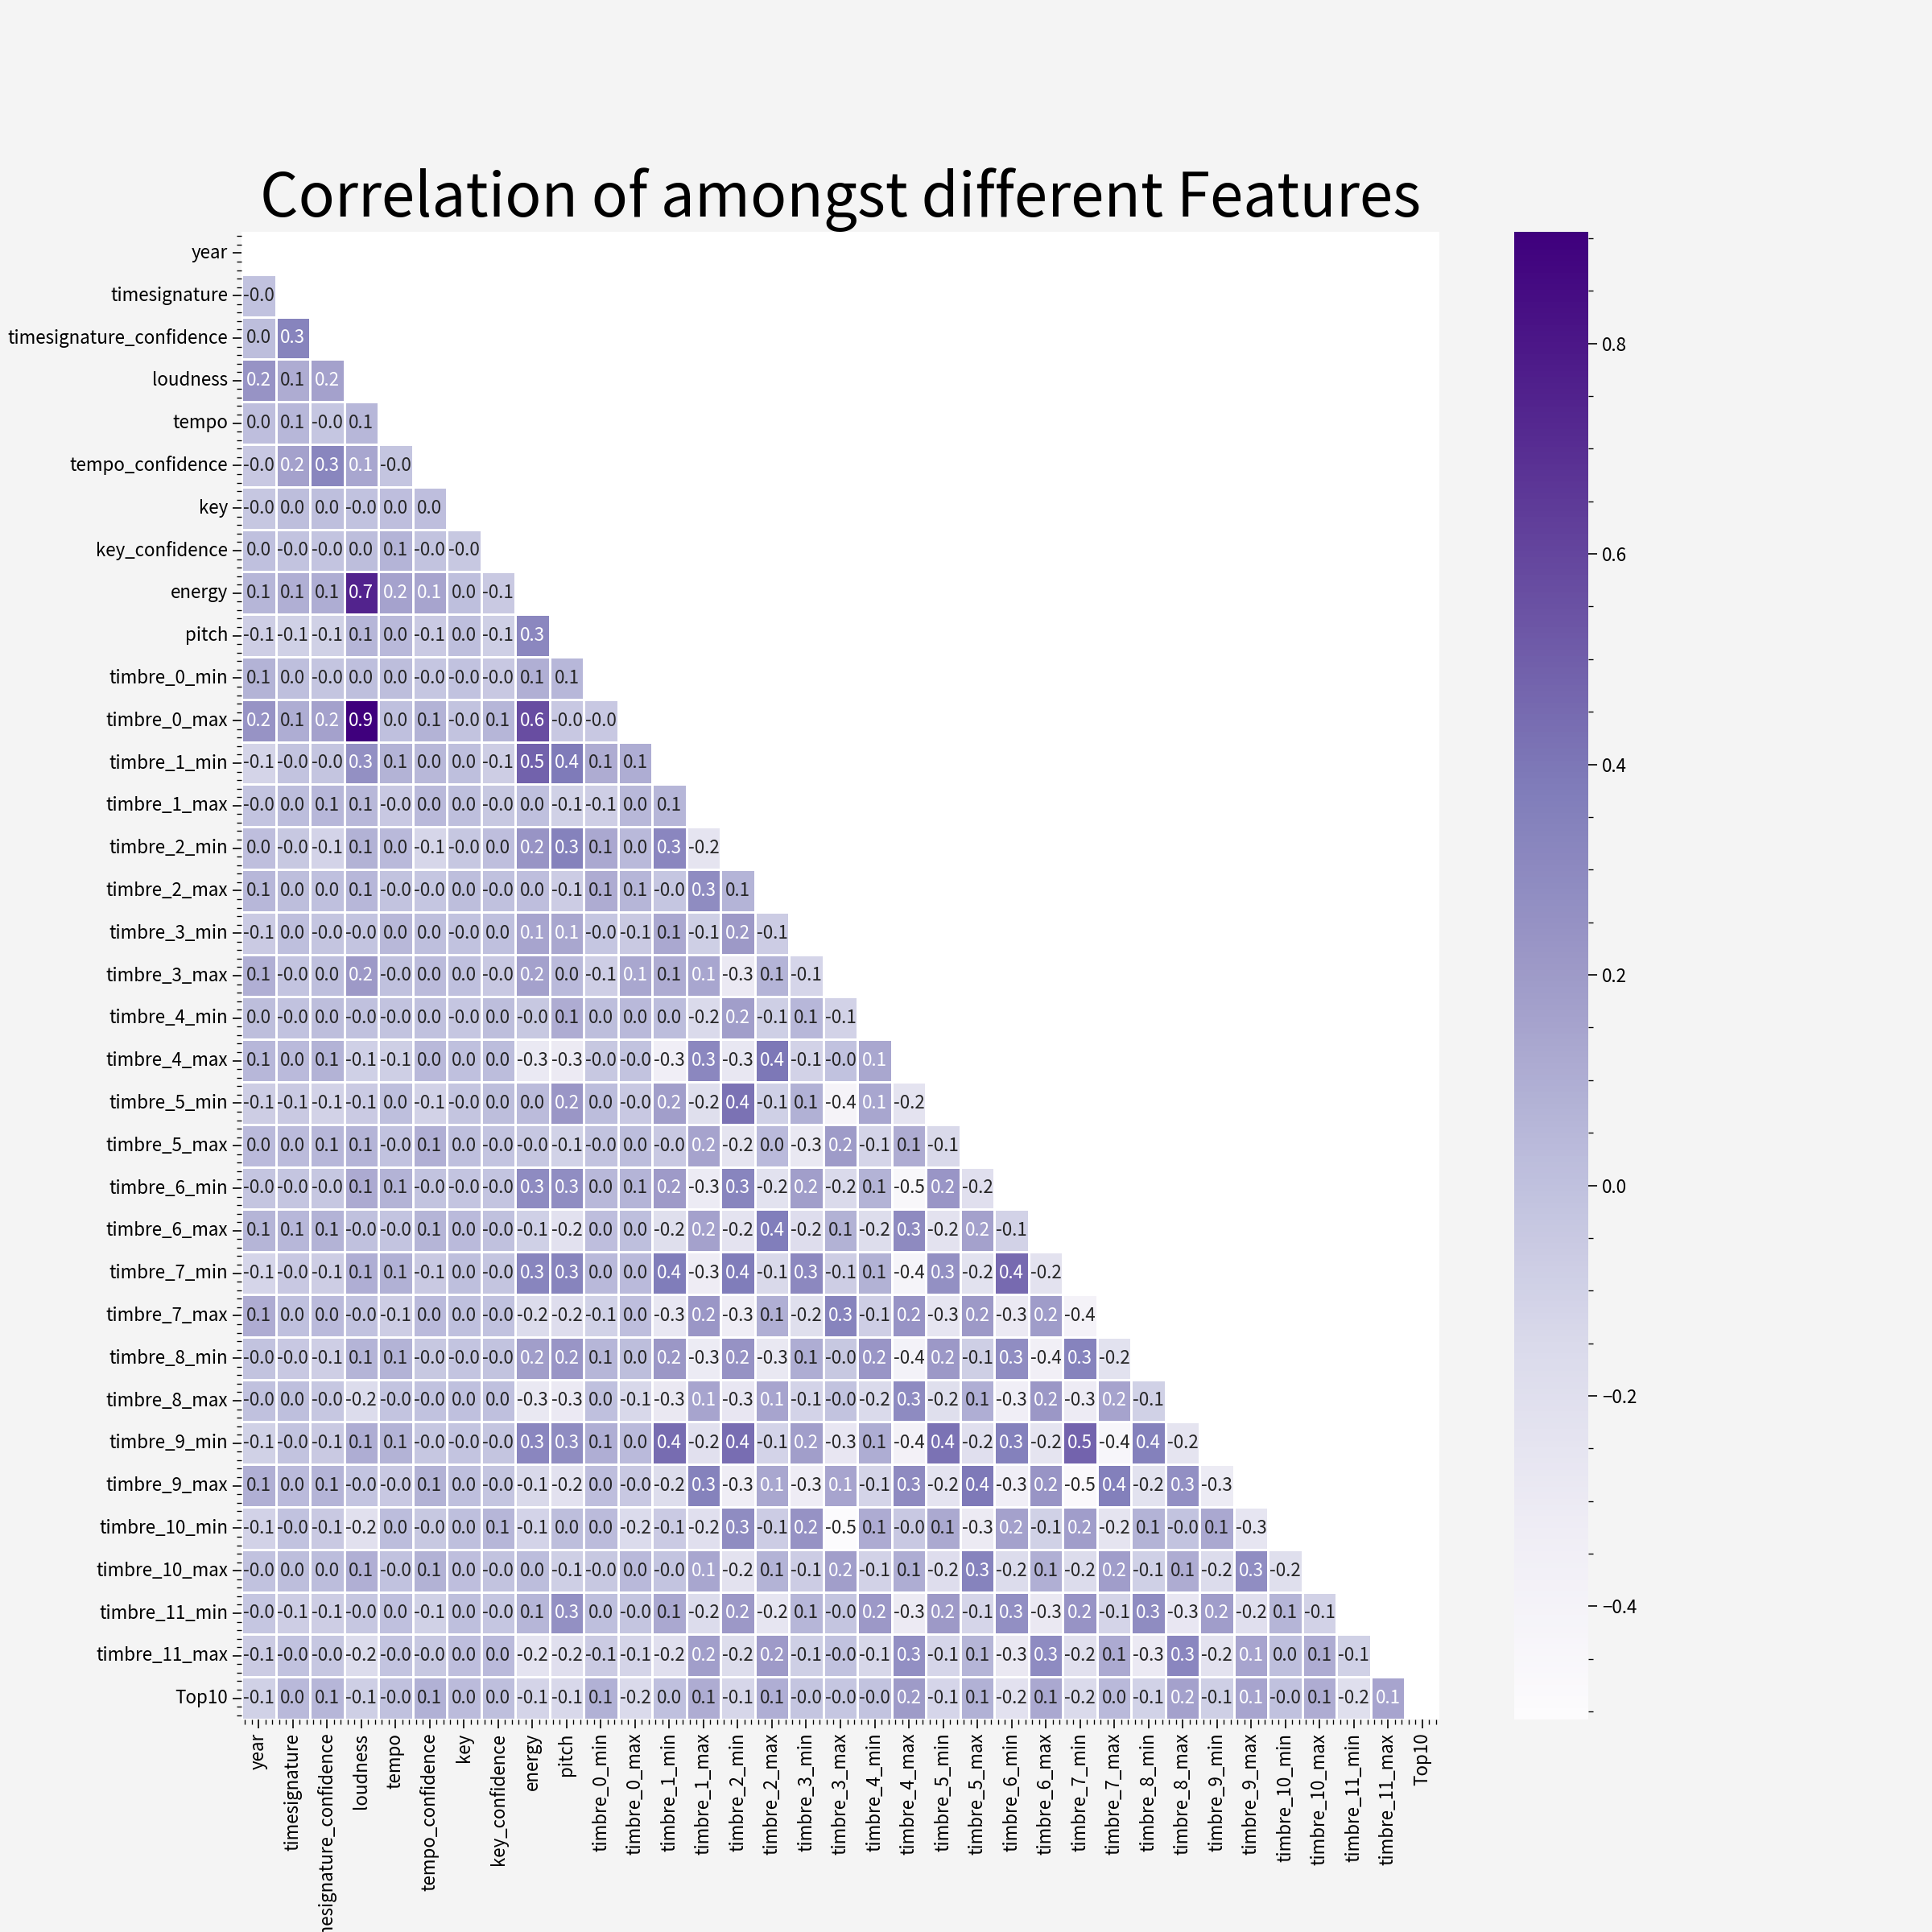

In [111]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Purples",mask=mask)
plt.title("Correlation of amongst different Features",color='black', fontsize=30);
plt.show() 

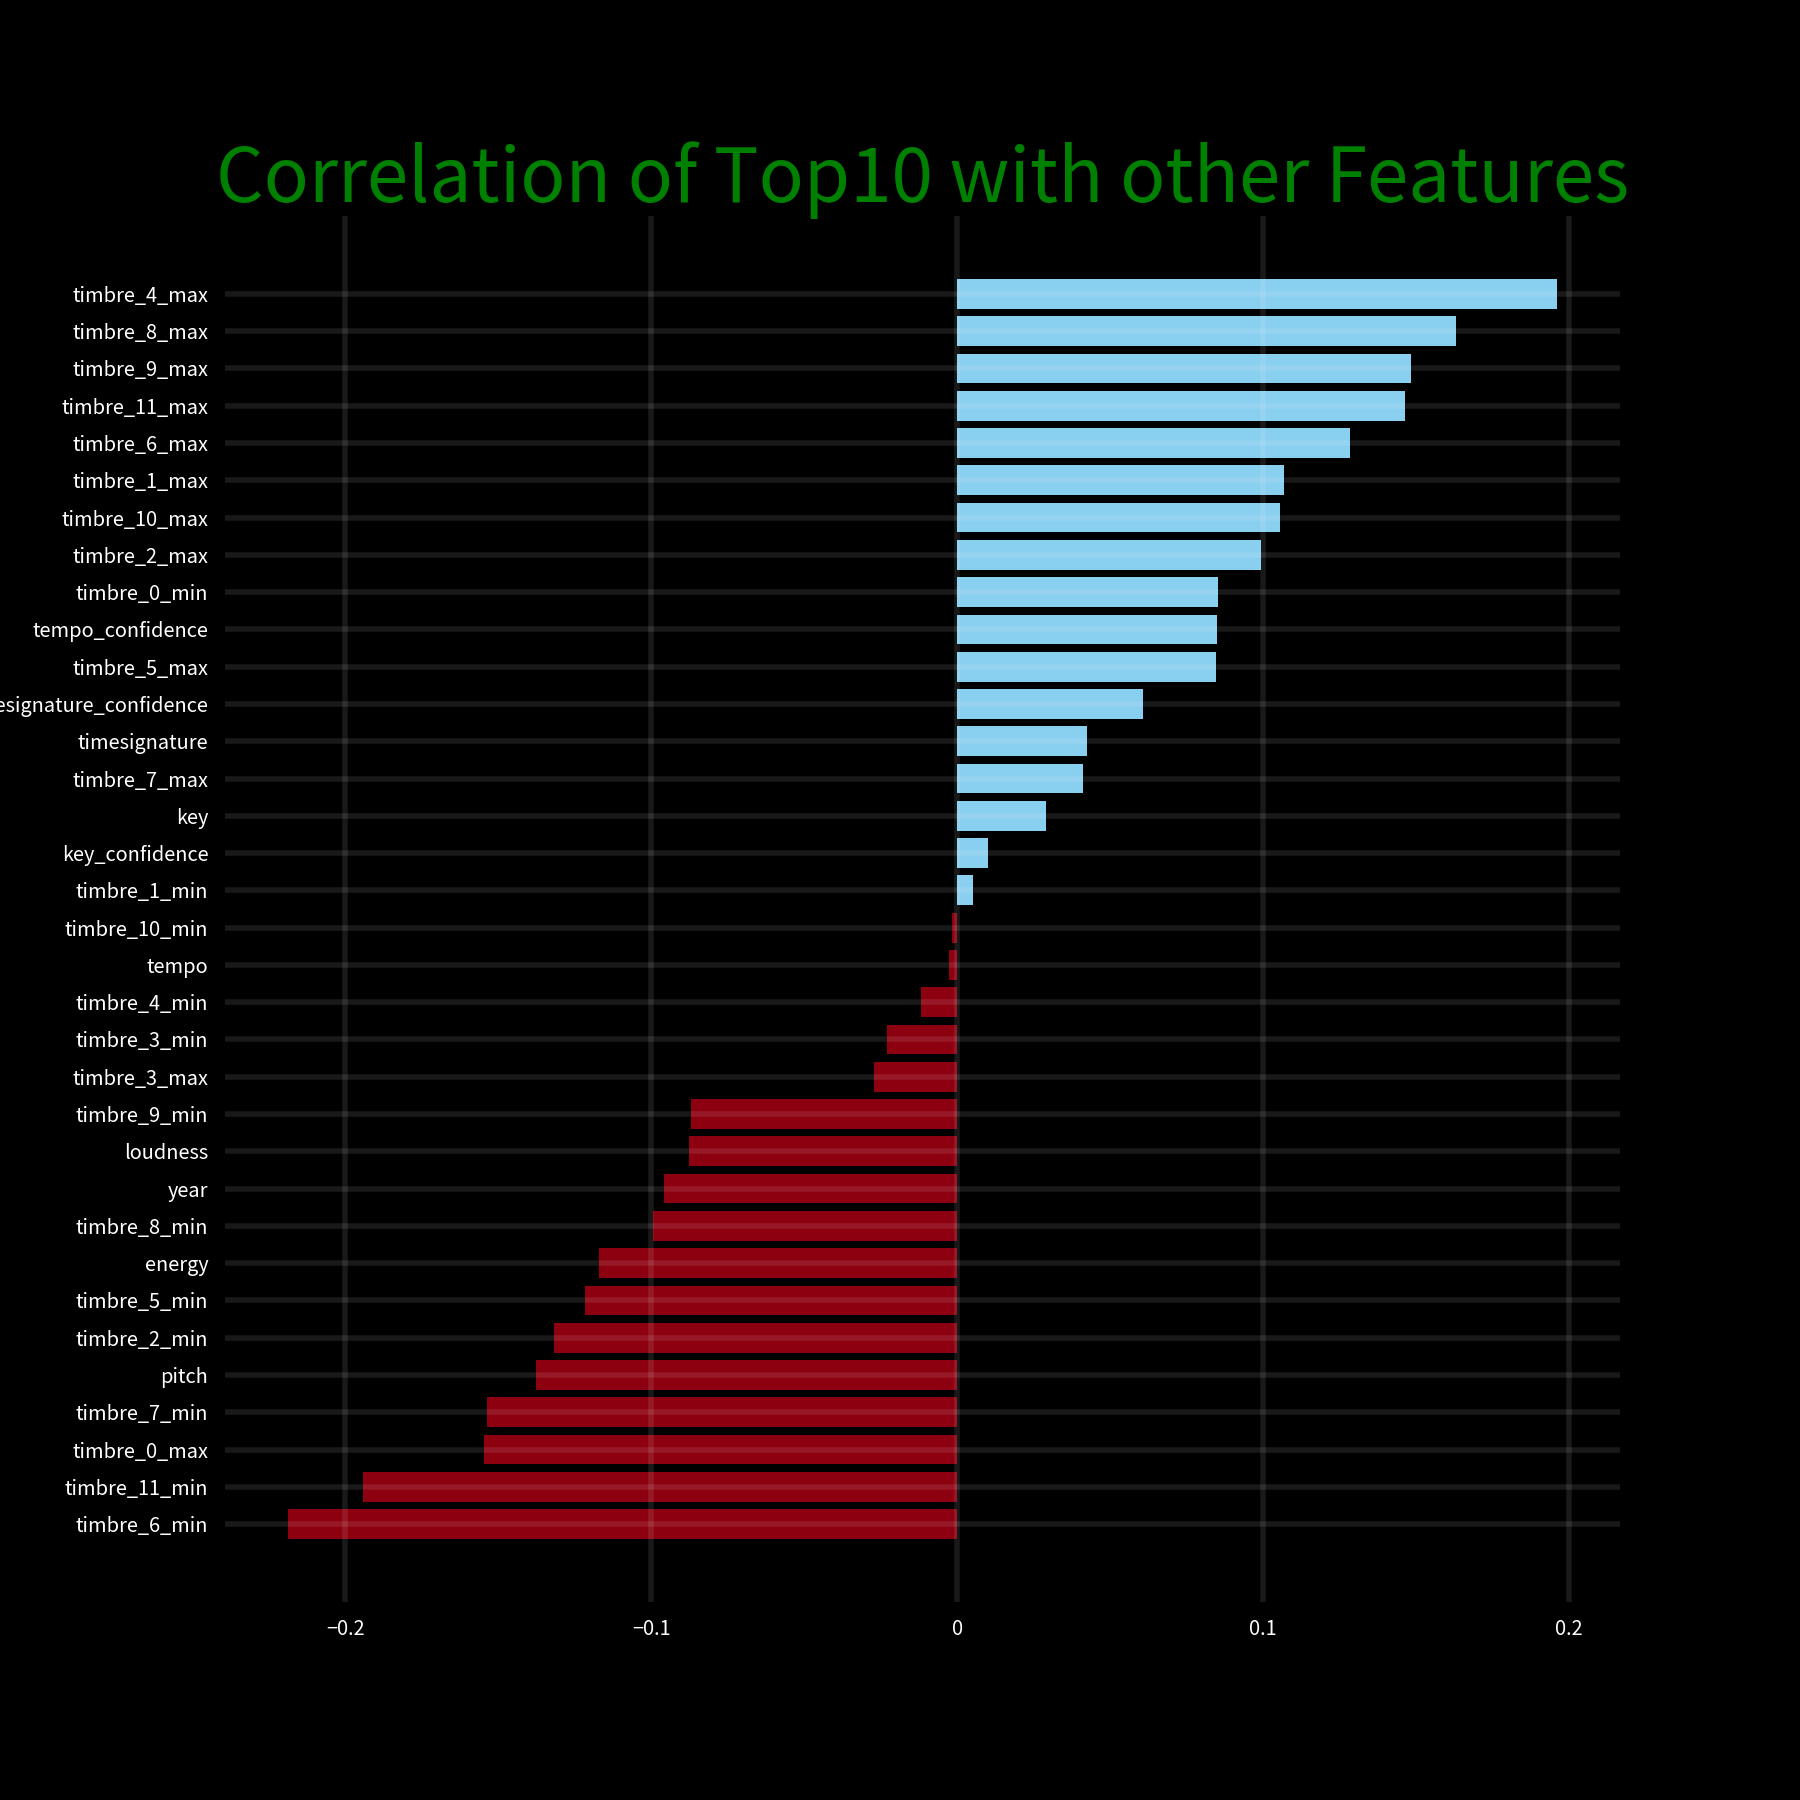

In [112]:
# Defining plots design
def plots_design():
    fig.patch.set_facecolor('black')
    ax.patch.set_facecolor('black')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.yaxis.set_label_coords(0, 0)
    ax.grid(color='white', linewidth=2)
    # Remove ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    # Remove axes splines
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    # Font
    mpl.rcParams['font.family'] = 'Source Sans Pro'


corr = data[data.columns].corr()['Top10'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.Top10 > 0.99].index)

# Visualization
fig, ax = plt.subplots(figsize =(9, 9))

ax.barh(corr.index, corr.Top10, align='center', color = np.where(corr['Top10'] < 0, 'crimson', '#89CFF0'))

plots_design()
plt.title("Correlation of Top10 with other Features",color='green', fontsize=30);

# Author
plt.text(0.9, -7, "@sanakhan", fontsize=11, ha="right", color='blue');

In [151]:
Top10 = data['Top10']
data_exp  = data.drop('Top10', axis = 1)

In [152]:
X_train = data_exp[data_exp['year']<2010]
X_test = data_exp[data_exp['year']>=2010]
y_train = Top10[X_train.index]
y_test = Top10[X_test.index]

In [153]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_test)
LR_Predict_train = LR_Model.predict(X_train)
y_true = y_test
LR_Accuracy = accuracy_score(y_train, LR_Predict_train)
print("Train accuracy: " + str(LR_Accuracy))
print("Test accuracy:", np.round(accuracy_score(y_true, LR_Predict), 4))

Train accuracy: 0.8572420497153174
Test accuracy: 0.8686


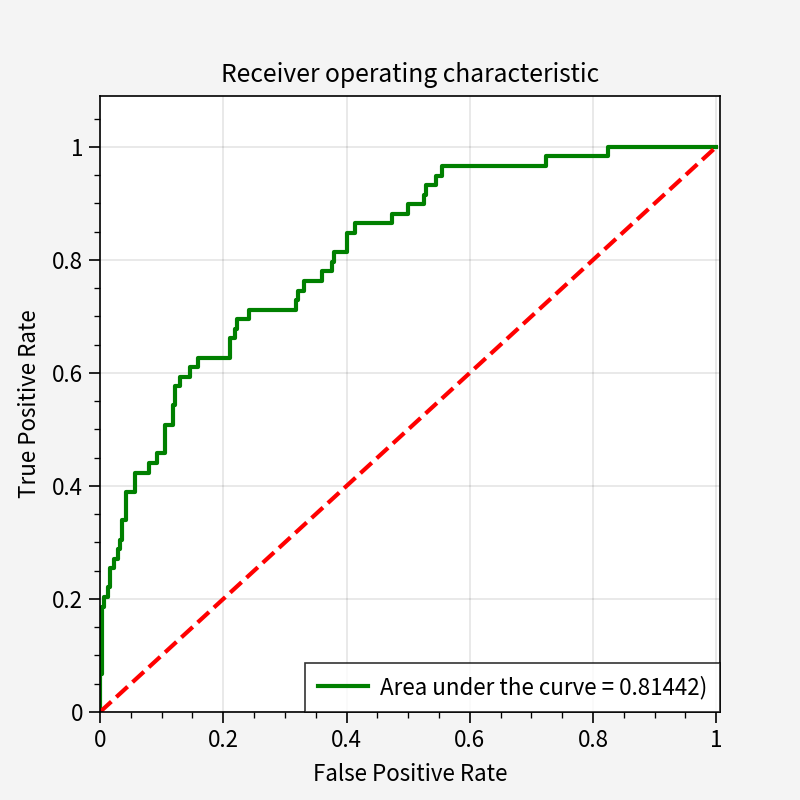

In [154]:
ROC = metrics.roc_auc_score(y_test,LR_Model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, LR_Model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Area under the curve = %0.5f)' % ROC,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.006])
plt.ylim([0.0, 1.09])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [120]:
scaled_data = preprocessing.scale(data_exp.T)
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([2.98918047e-01, 1.79430952e-01, 1.15749183e-01, 1.01449738e-01,
       6.90205043e-02, 5.41022792e-02, 3.15832702e-02, 2.11432314e-02,
       1.92608748e-02, 1.48029596e-02, 1.38613333e-02, 1.26372198e-02,
       1.06189546e-02, 1.00811248e-02, 9.09107321e-03, 7.55799289e-03,
       5.90146013e-03, 5.44615410e-03, 4.42649797e-03, 3.60271672e-03,
       3.15210724e-03, 2.85901271e-03, 2.02849177e-03, 1.55841576e-03,
       8.55629285e-04, 5.18797508e-04, 2.99976124e-04, 3.00719553e-05,
       6.75636358e-06, 2.08348172e-06, 1.71831306e-06, 9.96254905e-07,
       3.72774777e-07, 3.01777201e-09])

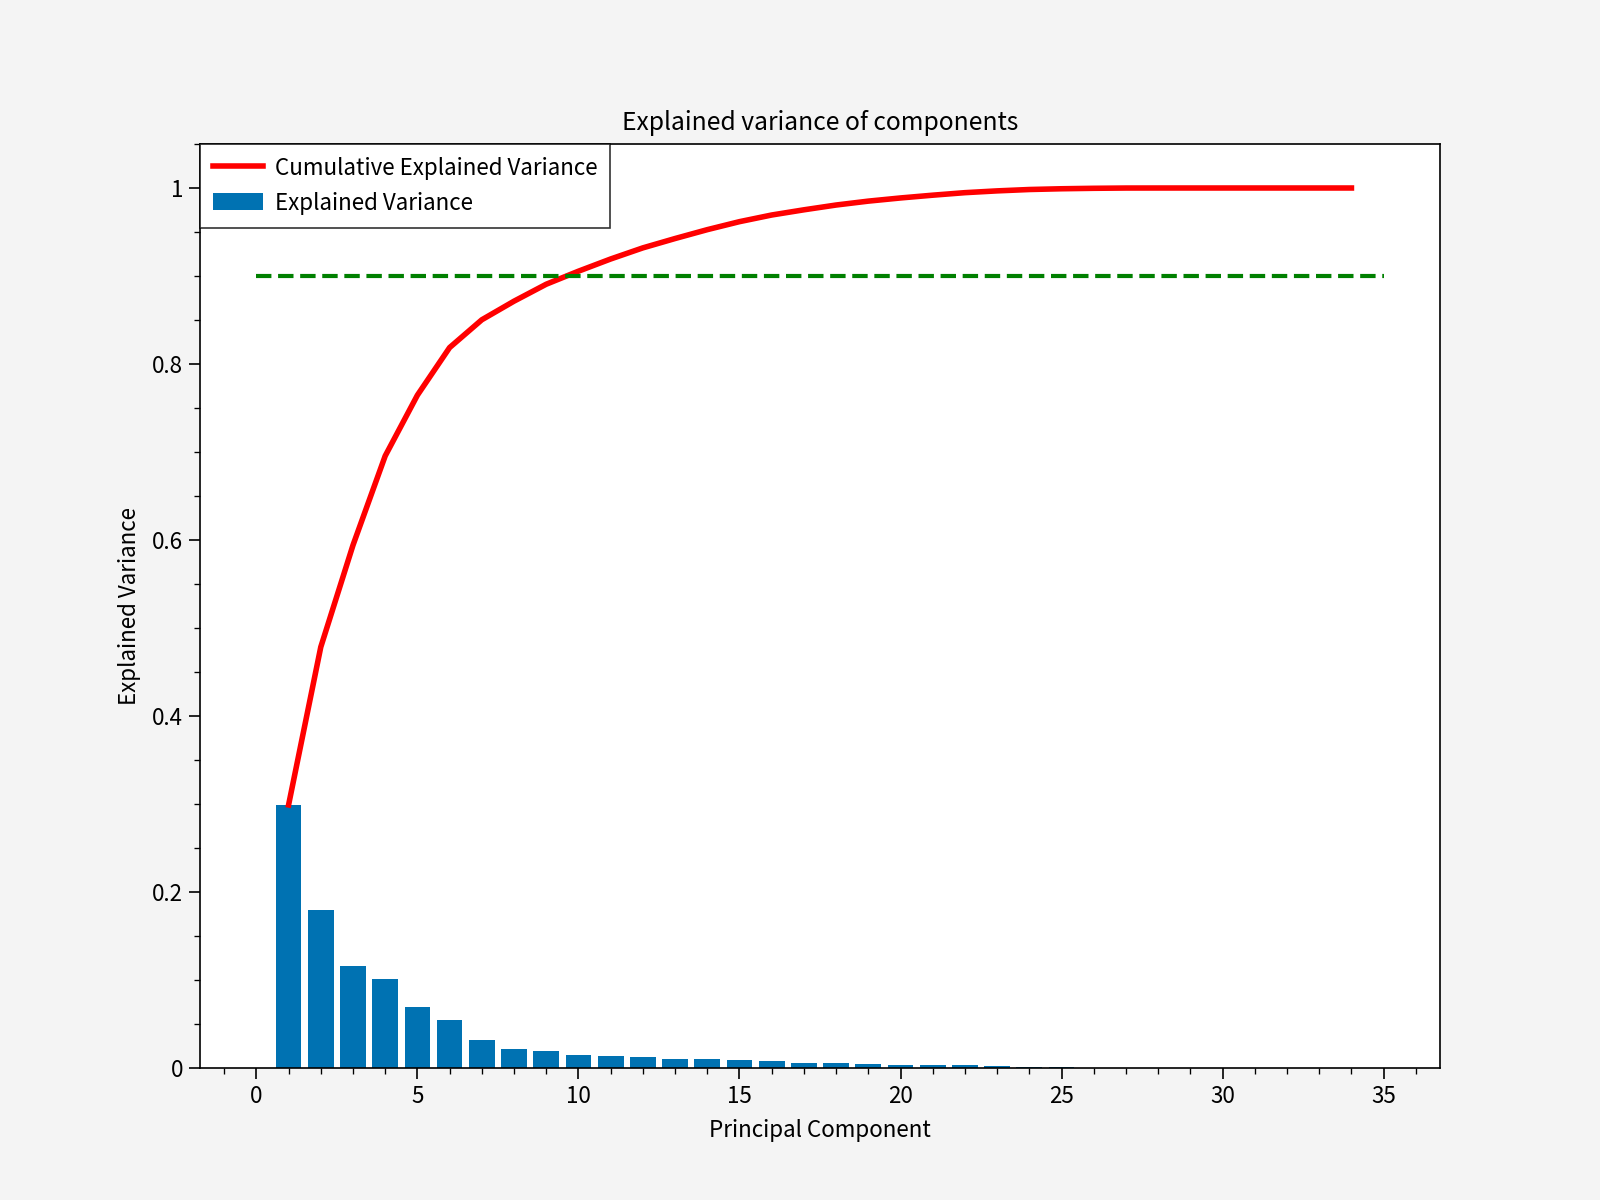

In [121]:
pca = PCA().fit(X_train)
fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [122]:
X_train_new = data_exp[data_exp['year']<2010]
X_test_new = data_exp[data_exp['year']>=2010]
y_train_new = Top10[X_train_new.index]
y_test_new = Top10[X_test_new.index]

In [123]:
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train_new)
X_test = pca.transform(X_test_new)
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train_new)
LR_Predict = LR_Model.predict(X_test)
LR_Predict_train = LR_Model.predict(X_train)
y_true = y_test_new
LR_Accuracy = accuracy_score(y_train_new, LR_Predict_train)
print("Train accuracy: " + str(LR_Accuracy))
print("Test accuracy:", np.round(accuracy_score(y_true, LR_Predict), 4))

Train accuracy: 0.8509929176503264
Test accuracy: 0.8418


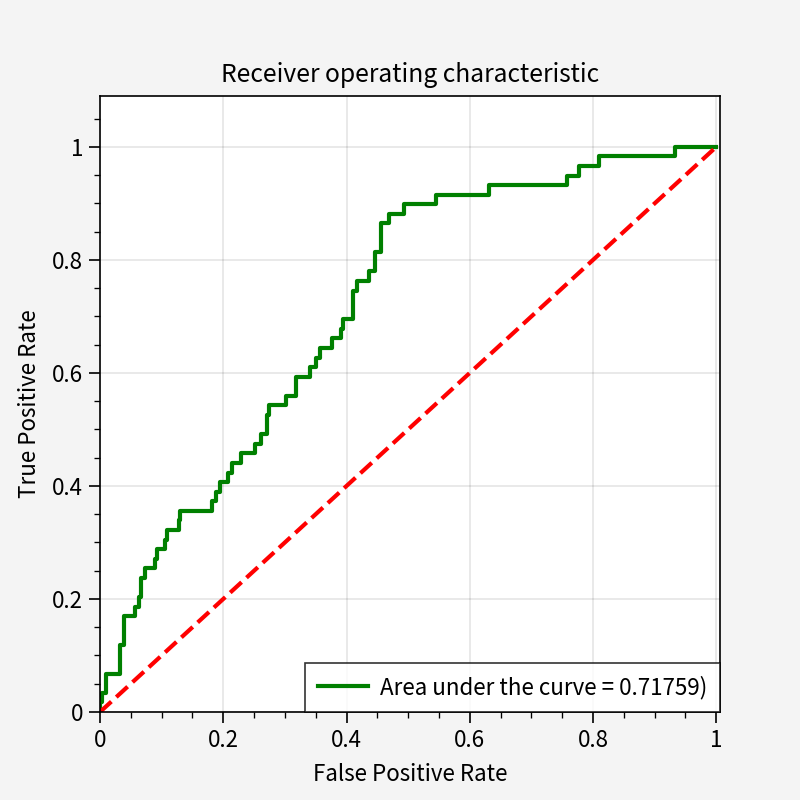

In [124]:
ROC = metrics.roc_auc_score(y_test_new,LR_Model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test_new, LR_Model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Area under the curve = %0.5f)' % ROC,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.006])
plt.ylim([0.0, 1.09])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [125]:
data['Confidences']=  data['tempo_confidence']*data['timesignature_confidence']
data  = data.drop('energy', axis = 1)
data['TempoPitchLoud'] = data['tempo']*data['pitch']*data['loudness']

In [126]:
X_train = data[data['year']<2010]
X_test = data[data['year']>=2010]
y_train = Top10[X_train.index]
y_test = Top10[X_test.index]

LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_test)
LR_Predict_train = LR_Model.predict(X_train)
y_true = y_test
LR_Accuracy = accuracy_score(y_train, LR_Predict_train)
print("Train accuracy: " + str(LR_Accuracy))
print("Test accuracy:", np.round(accuracy_score(y_true, LR_Predict), 4))


Train accuracy: 0.8577975281210943
Test accuracy: 0.8713


In [127]:
pip install featurewiz

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: lightgbm>=3.2.1 in c:\users\khan1\anaconda3\lib\site-packages (from featurewiz) (3.3.2)


You should consider upgrading via the 'C:\Users\khan1\anaconda3\python.exe -m pip install --upgrade pip' command.


In [128]:
from featurewiz import featurewiz
np.random.seed(1234)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (7574, 36)
    Loaded train data. Shape = (7574, 36)
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data 

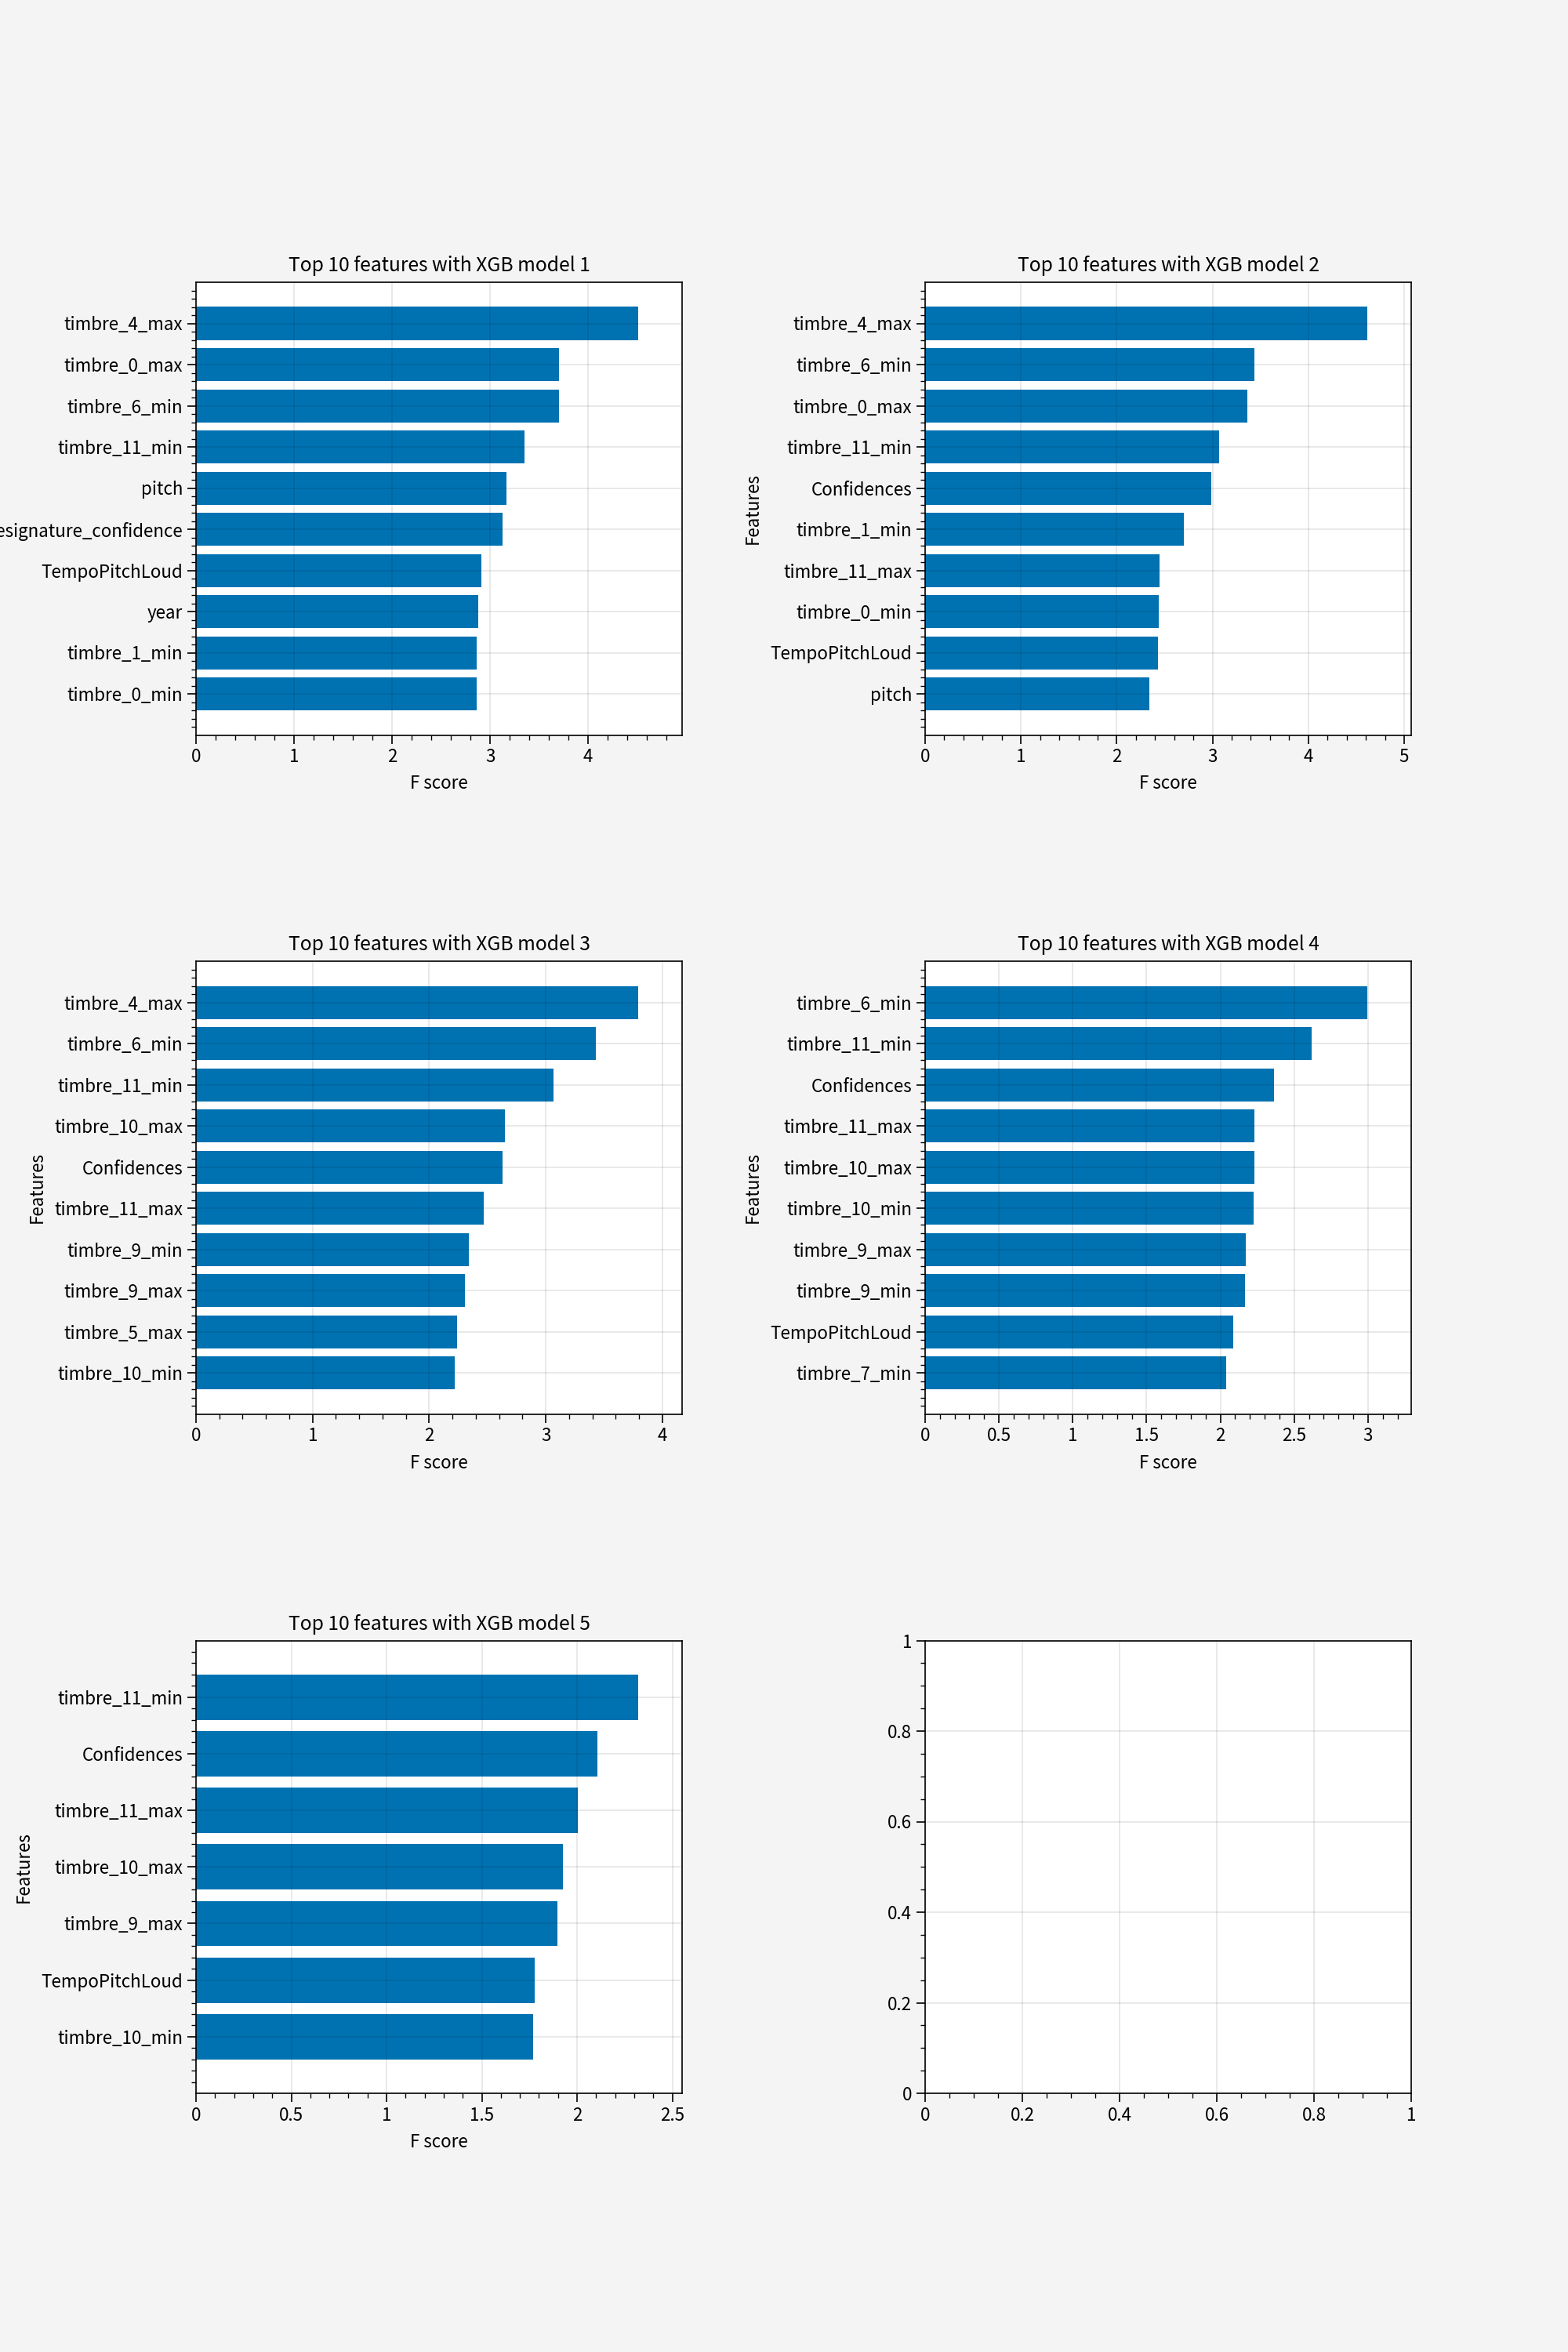

            Total time taken for XGBoost feature selection = 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 18 important features:
['timbre_4_max', 'timbre_0_max', 'timbre_6_min', 'timbre_11_min', 'pitch', 'timesignature_confidence', 'TempoPitchLoud', 'year', 'timbre_1_min', 'timbre_0_min', 'Confidences', 'timbre_11_max', 'timbre_10_max', 'timbre_9_min', 'timbre_9_max', 'timbre_5_max', 'timbre_10_min', 'timbre_7_min']

    Time taken for feature selection = 3 seconds
    Reverted column names to original names given in train dataset


In [129]:
target = 'Top10'
 
features, train = featurewiz(data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [130]:
print(features)

['timbre_4_max', 'timbre_0_max', 'timbre_6_min', 'timbre_11_min', 'pitch', 'timesignature_confidence', 'TempoPitchLoud', 'year', 'timbre_1_min', 'timbre_0_min', 'Confidences', 'timbre_11_max', 'timbre_10_max', 'timbre_9_min', 'timbre_9_max', 'timbre_5_max', 'timbre_10_min', 'timbre_7_min']


In [131]:
training = data.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['Top10']
X_test = data.drop(training.index)[features]

In [132]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [135]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Predict_train = LR_Model.predict(X_train)
y_true=y_valid
LR_Accuracy = accuracy_score(y_train, LR_Predict_train)
print("Train Accuracy: " + str(LR_Accuracy))
print("Test accuracy:", np.round(accuracy_score(y_true, LR_Predict), 4))


Train Accuracy: 0.8572312770786054
Test accuracy: 0.8515


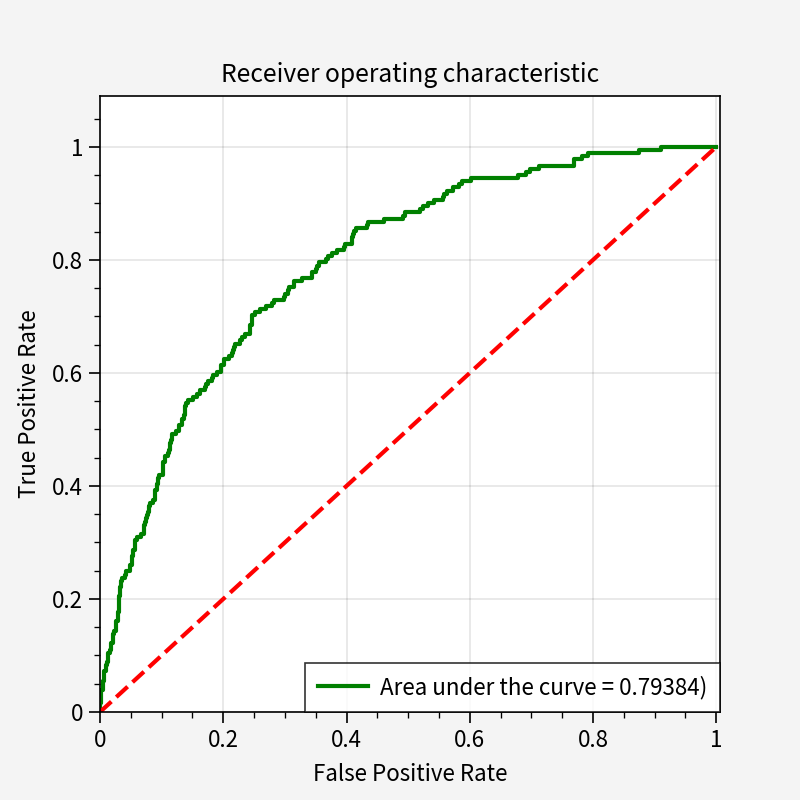

In [141]:
ROC = metrics.roc_auc_score(y_valid,LR_Model.predict_proba(X_valid)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_valid, LR_Model.predict_proba(X_valid)[:,1])

plt.plot(fpr, tpr, label='Area under the curve = %0.5f)' % ROC,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.006])
plt.ylim([0.0, 1.09])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [142]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Predict_train = RFC_Model.predict(X_train)
y_true=y_valid
RFC_Accuracy = accuracy_score(y_train, RFC_Predict_train)
print("Train Accuracy: " + str(RFC_Accuracy))
print("Test accuracy:", np.round(accuracy_score(y_true, RFC_Predict), 4))


Train Accuracy: 1.0
Test accuracy: 0.8647


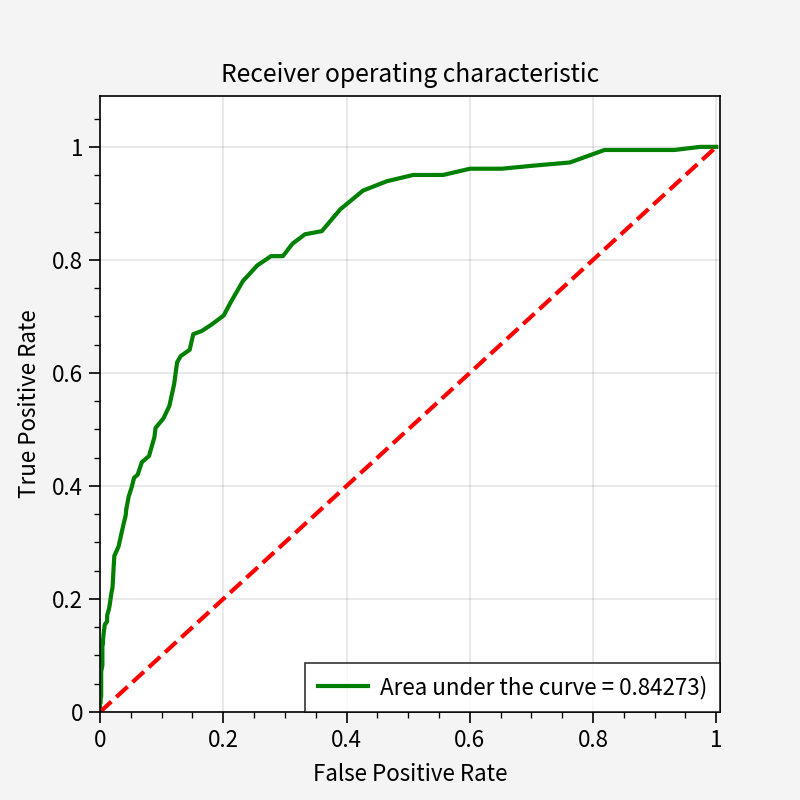

In [143]:
ROC = metrics.roc_auc_score(y_valid,RFC_Model.predict_proba(X_valid)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_valid, RFC_Model.predict_proba(X_valid)[:,1])

plt.plot(fpr, tpr, label='Area under the curve = %0.5f)' % ROC,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.006])
plt.ylim([0.0, 1.09])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [144]:

XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_valid)
XGB_Predict_train = XGB_Model.predict(X_train)
XGB_Accuracy = accuracy_score(y_train, XGB_Predict_train)
print("Train Accuracy: " + str(XGB_Accuracy))

print("Test accuracy:", np.round(accuracy_score(y_true, XGB_Predict), 4))


Train Accuracy: 0.9024138642459253
Test accuracy: 0.8647


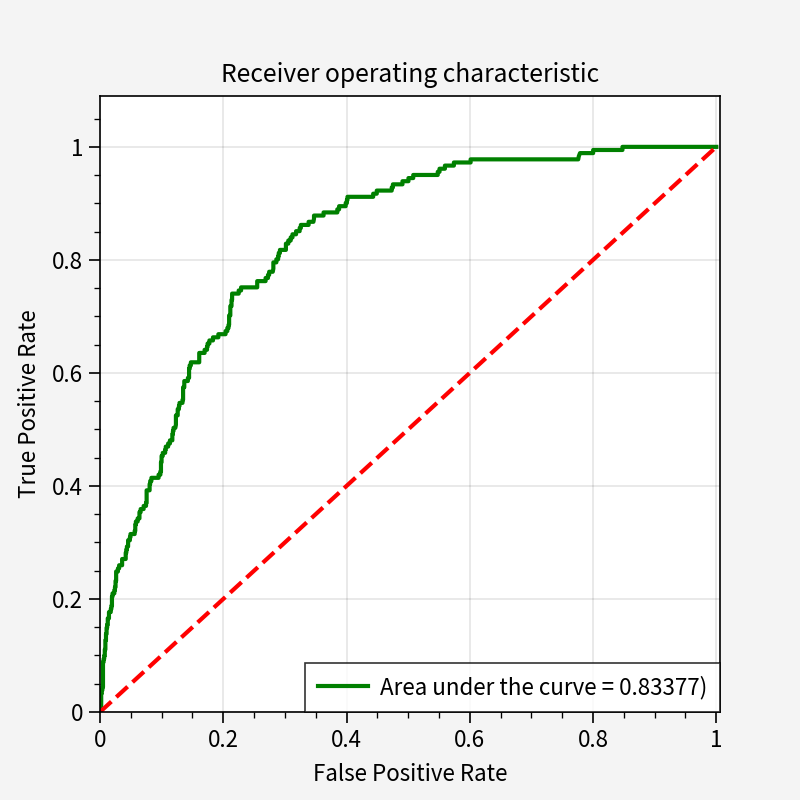

In [145]:
ROC = metrics.roc_auc_score(y_valid,XGB_Model.predict_proba(X_valid)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_valid, XGB_Model.predict_proba(X_valid)[:,1])

plt.plot(fpr, tpr, label='Area under the curve = %0.5f)' % ROC,color="green")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.006])
plt.ylim([0.0, 1.09])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [146]:
logit_model=sm.Logit(y_train,X_train[features])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.347200
         Iterations 8
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.169      
Dependent Variable:    Top10               AIC:                 3401.7521  
Date:                  2022-05-14 21:20    BIC:                 3518.5022  
No. Observations:      4847                Log-Likelihood:      -1682.9    
Df Model:              17                  LL-Null:             -2026.1    
Df Residuals:          4829                LLR p-value:         6.6170e-135
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        8.0000                                              
---------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------
timbre_4_max     